<a href="https://colab.research.google.com/github/mohcineelharras/daml_project/blob/main/project/daml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAML Poject

## Context

Les critères suivants seront appréciés :
* Compte-rendu : clarté et pertinence des explications, qualité de la présentation (en particulier les équations), analyse et interprétation des résultats ;
* Travail fourni : conformité aux objectifs précisés dans le texte, quantité
et qualité des résultats et conclusions ;
* Initiative et originalité.


**Présenter (avec synthèse) l’algorithme k-means et les algorithmes EM et CEM appliqués au modèle de mélange gaussien.**

## Import Libraries

In [237]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import seaborn as sns, numpy as np
from sklearn.neighbors import KernelDensity
import numpy as np
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, Point
import random
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal, norm
import pandas as pd
import io
import requests
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
import numpy as np
from sklearn import mixture
import urllib
import zipfile


## Simulation

1. Simulation d’un modèle de mélange :

* Écrire une fonction qui simule n points du plan suivant un modèle
de mélange de deux lois gaussiennes définies par leurs proportions,
centres, volumes, formes et orientations.
* Donner quelques exemples de simulation et donner les représentations
graphiques correspondantes.





> $g({\boldsymbol  {x}},{\boldsymbol  {\Phi }})=\sum _{{k=1}}^{g}\pi _{k}f({\boldsymbol  {x}},{\boldsymbol  {\theta }}_{k}) $





### Construct gmm pdf

In [193]:
#---------------------------------------------------------------------------
def normal_dist(x , mean , sd):
  #prob_density = (1/(2*np.pi*sd**2)) * np.exp(-0.5*((x-mean)/sd)**2)
  prob_density=norm(mean, sd)
  return prob_density.pdf(x)
#***************************************************************************
#---------------------------------------------------------------------------
def gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2):
  # Creating a series of gaussian data
  x1 = np.random.normal(mu1, sigma1, int(n*pi1))
  x2 = np.random.normal(mu2,  sigma2, int(n*pi2))
  # Creating a series of x for the plot
  #x = np.linspace(min(x1.min(),x2.min()),max(x1.max(),x2.max()),1000)
  #Apply function to the data.
  pdf1 = normal_dist(x,mu1,sigma1)
  pdf2 = normal_dist(x,mu2,sigma2)
  #gmm
  pdf3= pi1*pdf1 + pi2*pdf2
  return pdf1,pdf2,pdf3
#***************************************************************************
#---------------------------------------------------------------------------
def plotgmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2):
  pdf1,pdf2,pdf3=gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2)
  #Plotting the Results
  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(x,pdf1*pi1 , color = 'red',label="mu1="+str(mu1)+", sigma1="+str(sigma1)+", pi1="+str(pi1))
  ax.plot(x,pdf2*pi2 , color = 'blue',label="mu2="+str(mu2)+", sigma2="+str(sigma2)+", pi1="+str(pi2))
  #ax.plot(x,pdf3 , color = 'green',label=str(pi1)+"N(mu1="+str(mu1)+",sigma1="+str(sigma1)+")+"+str(pi2)+"N(mu2="+str(mu2)+",sigma2="+str(sigma2)+")")
  ax.plot(x,pdf3 , color = 'green',label=str(pi1)+"N1+"+str(pi2)+"N2")
  plt.xlabel('Data points')
  plt.ylabel('Probability Density')
  ax.legend()

**Config 1 :**

$\ N(mu_{1}=0 ,\sigma_{1}=0.1) ; \pi_{1} = 0.4  ; $

$\ N(mu_{2}= 0.2,\sigma_{2}=0.2) ; \pi_{2} =  0.6 ;$

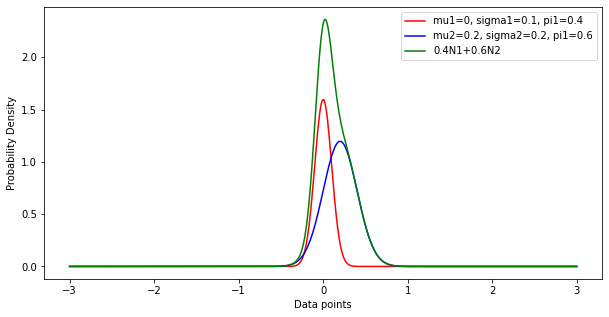

In [194]:
x=np.linspace(-3,3,1000)
plotgmm2(x,n=1000,mu1=0,sigma1=0.1,pi1=0.4,mu2=0.2,sigma2=0.2,pi2=0.6)

**Config 2 :**

$\ N(mu_{1}= ,\sigma_{1}=) ; \pi_{1} = 0.2  ; $

$\ N(mu_{2}= ,\sigma_{2}=) ; \pi_{2} =  0.8 ;$

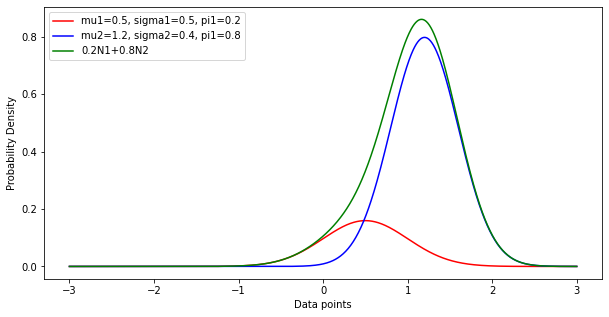

In [195]:
x=np.linspace(-3,3,1000)
plotgmm2(x,n=1000,mu1=0.5,sigma1=0.5,pi1=0.2,mu2=1.2,sigma2=0.4,pi2=0.8)

### Generate simulated Data from pdf

In [ ]:
#---------------------------------------------------------------------------
x=np.linspace(-0.5,1.2,1000)
n=10000
mu1,sigma1,pi1,mu2,sigma2,pi2=0,0.1,0.4,0.6,0.2,0.6
pdf1,pdf2,pdf3 = gmm2(x,n,mu1,sigma1,pi1,mu2,sigma2,pi2)
#***************************************************************************
#---------------------------------------------------------------------------
poly = Polygon([(x.min(), pdf3.min()), (x.max(), pdf3.min()), (x.max(), pdf3.max()),(x.min(), pdf3.max())])
min_x, min_y, max_x, max_y = poly.bounds
#---------------------------------------------------------------------------
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
       random_point = Point([random.uniform(min_x, max_x),  random.uniform(min_y, max_y)])
       if (random_point.within(poly)):
           points.append(random_point)
    return points
#---------------------------------------------------------------------------
points = random_points_within(poly, n)
#sampled data points 
xs = [point.x for point in points]
ys = [point.y for point in points]
#---------------------------------------------------------------------------
fig1, ax1 = plt.subplots()
ax1.scatter(xs, ys,alpha=0.2, label='Random Data Points')
ax1.plot(x,pdf3,color='r',label='PDF')
plt.xlabel('X', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
ax1.legend()
#---------------------------------------------------------------------------
df = pd.DataFrame({'xs':xs,'ys':ys},index=None)
#---------------------------------------------------------------------------
#using a list
l = []
for i in range(len(df)):
  if df.loc[i,'ys']<gmm2(df.loc[i,'xs'],n,mu1,sigma1,pi1,mu2,sigma2,pi2)[2]:
    l.append([df.loc[i,'xs']])
under_curve = np.asarray(l)
#---------------------------------------------------------------------------
#plotting the results
fig2, ax2 = plt.subplots()
sns.distplot(under_curve,bins=100, label='Simulated Data')
plt.xlabel('X', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
ax2.legend()
#***************************************************************************
#---------------------------------------------------------------------------
#***************Redetermine 2 gaussian pdfs*********************************
np.random.seed(1)
g = mixture.GaussianMixture(n_components=2)
# Generate random observations with two modes centered on 0
g.fit(under_curve) 
print("N1 simulated   ","mu1=",np.round(g.means_, 3)[0][0],"std1=",np.round(g.covariances_, 3)[0][0][0])
print("N2 simulated   ","mu2=",np.round(g.means_, 3)[1][0],"std2=",np.round(g.covariances_, 3)[1][0][0])
print("N1 Real        ","mu1=",mu1,"std1",sigma1)
print("N2 Real        ","mu2",mu2,"std2",sigma2)

## Conditional Expectation Maximization (CEM)

* Programmer l’algorithme CEM pour les modèles parcimonieux [π,λI],
[πk, λI], [π, λkI] et [πk, λkI].

## Comparaison de CEM avec K-means

**Comparer votre algorithme et l’algorithme des kmeans sur des jeux de données simulées et réelles.**


Pour les données réelles, vous pouvez choisir (en motivant ce choix) une application et un jeu de données parmi ceux proposés sur le site web :
      http://archive.ics.uci.edu/ml/datasets.php

* Le jeu de données choisi est **Audit Data Data Set**

In [241]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
extract_dir = "data"
zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)
df=pd.read_csv("./"+extract_dir+"/audit_data/audit_risk.csv")

* Pour les données simulées, on comparera tout d’abord les deux algorithmes lorsque les classes sont très séparées (err ≈ 0.05 c.à.d. chevauchement des classes de 5%); pour cela, on étudiera des situations correspondant à des proportions égales, différentes ou très différentes et des situations correspondant à des volumes égaux, différents ou très différents. 
* On fera les mêmes comparaisons lorsque les classes sont moyennement séparées (err ≈ 0.15) et très séparées (err ≈ 0.30). 

### err = 0.05 chevauchement des classes de 5%

#### Proportions égales

#### Proportions différentes

#### Proportions très différentes

### err = 0.15 chevauchement des classes de 15%

### err = 0.3 chevauchement des classes de 30%

## Apprentissage Supervisé (classement ou classification)
* Comment peut-on utiliser les modèles de mélange pour faire de l’apprentissage supervisé (classement)? Illustrer votre réponse par une application de votre choix. 

**On peut estimer la densité de probabilité en calculant la moyenne empirique et la variance empirique pour chaque classe et ensuite on aura accès à la loi gaussienne de chaque classe ce qui permettra d'estimer la probabilité d'appartenance d'un point dans l'espace à cette classe là**

* Proposer ainsi une autre méthode d’apprentissage supervisé, la Présenter (avec synthèse) et la comparer avec les modèles de mélange.


**L'algorithmes d'apprentissage supervisé choisi sont la régression logistique.**

### Logistic regression
Algorithme d'apprentissage supervisé qui permet de faire de la classification


\begin{equation}
    \ Z = β₀ + β₁X
\end{equation}



Hypothèse fondamentale

1.   Hypothèse fondamentale (Sigmoid Function)


\begin{equation}
    \ hΘ(x) = 1/(1 + e^-(β₀ + β₁X)
\end{equation}


\begin{equation}
    \ 𝑃(𝑐𝑙𝑎𝑠𝑠=1)=hΘ(x) = sigmoid(Z)
\end{equation}

2.   Frontière de décision
\begin{equation}
    \ 𝑝≥0.5 => 𝑐𝑙𝑎𝑠𝑠=1 
\end{equation}
\begin{equation}
    \ 𝑝<0.5 => 𝑐𝑙𝑎𝑠𝑠=0
\end{equation}


3.   Fonction de cout

Pour des raisons de convexité, on définit la fonction de coût suivante

\begin{equation}
    \ Cost(ℎ𝜃(𝑥),𝑦)=−𝑦log(ℎ𝜃(𝑥))−(1−𝑦)log(1−ℎ𝜃(𝑥))
\end{equation}


4.   Gradient Descent


\begin{equation}
    \ 𝜃𝑗= 𝜃𝑗  - \nabla 𝐽(𝜃)
\end{equation}



#### Simple Dataset

**Import and split data**

In [181]:
#---------------------------------------------------------------------------
X, y = make_blobs(n_samples=10000, centers=2, n_features=2,
                  random_state=0)
#---------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)
#***************************************************************************
#---------------------------------------------------------------------------
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

##### Training DataSet

In [183]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_train)
#***************************************************************************
#---------------------------------------------------------------------------
# Accuracy
print("Accuracy :",accuracy_score(y_train, y_pred))
# Recall
print("Recall :",recall_score(y_train, y_pred, average=None))
# Precision
print("Precision :",precision_score(y_train, y_pred, average=None))
# F1 Score
print("F1 :",f1_score(y_train, y_pred, average='macro'))


Accuracy : 0.9628235294117647
Recall : [0.96426881 0.96139448]
Precision : [0.96108491 0.96455399]
F1 : 0.962822934578718


##### Testing DataSet

In [184]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_test)
#***************************************************************************
#---------------------------------------------------------------------------
# Accuracy
print("Accuracy :",accuracy_score(y_test, y_pred))
# Recall
print("Recall :",recall_score(y_test, y_pred, average=None))
# Precision
print("Precision :",precision_score(y_test, y_pred, average=None))
# F1 Score
print("F1 :",f1_score(y_test, y_pred, average='macro'))


Accuracy : 0.9586666666666667
Recall : [0.95090439 0.96694215]
Precision : [0.96842105 0.94864865]
F1 : 0.9586454196022489


#### Chosen Dataset

**Import and split dataset**

In [ ]:
#---------------------------------------------------------------------------
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
extract_dir = "data"
zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)
df=pd.read_csv("./"+extract_dir+"/audit_data/audit_risk.csv")
df_dummies=pd.get_dummies(df.dropna())
#***************************************************************************
#---------------------------------------------------------------------------
df_false=df_dummies[df_dummies.Risk==0]
X_false=df_false.drop("Risk",axis=1)
y_false=df_false["Risk"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.2, random_state=42)
#***************************************************************************
#---------------------------------------------------------------------------
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

##### Training DataSet

In [189]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_train)
#***************************************************************************
#---------------------------------------------------------------------------
# Accuracy
print("Accuracy :",accuracy_score(y_train, y_pred))
# Recall
print("Recall :",recall_score(y_train, y_pred, average=None))
# Precision
print("Precision :",precision_score(y_train, y_pred, average=None))
# F1 Score
print("F1 :",f1_score(y_train, y_pred, average='macro'))


Accuracy : 0.8170683524298696
Recall : [0.88976913 0.74473595]
Precision : [0.77618719 0.87163943]
F1 : 0.816156135895101


##### Testing DataSet

In [190]:
#---------------------------------------------------------------------------
y_pred=logreg.predict(X_test)
#***************************************************************************
#---------------------------------------------------------------------------
# Accuracy
print("Accuracy :",accuracy_score(y_test, y_pred))
# Recall
print("Recall :",recall_score(y_test, y_pred, average=None))
# Precision
print("Precision :",precision_score(y_test, y_pred, average=None))
# F1 Score
print("F1 :",f1_score(y_test, y_pred, average='macro'))


Accuracy : 0.8170770706747682
Recall : [0.889029   0.74302401]
Precision : [0.7807309 0.8667676]
F1 : 0.8157538434661076


### Create GMM supervised Learning algorithme

#### Simple Dataset

In [172]:
#---------------------------------------------------------------------------
X, y = make_blobs(n_samples=10000, centers=2, n_features=2,random_state=0)
df=pd.DataFrame(X)
df["y"]=y

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df[df.y==0]
X_false=df_false.drop("y",axis=1)
y_false=df_false["y"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.2, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df[df.y==1]
X_true=df_true.drop("y",axis=1)
y_true=df_true["y"]
print(X_true.shape,y_true.shape)
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

(5000, 2) (5000,)


##### Training DataSet

In [173]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Training DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_train))
true_dist=K_true.pdf(np.array(X_false_train))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_train),columns=["y_false_train"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_train"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_train))
true_dist=K_true.pdf(np.array(X_true_train))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_train),columns=["y_true_train"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_train"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_train"]
pddf_negative["y"]=pddf_negative["y_false_train"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
# Accuracy
print("Accuracy :",accuracy_score(full_pddf["y"], full_pddf["decision"]))
# Recall
print("Recall :",recall_score(full_pddf["y"], full_pddf["decision"], average=None))
# Precision
print("Precision :",precision_score(full_pddf["y"], full_pddf["decision"], average=None))
# F1 Score
print("F1 :",f1_score(full_pddf["y"], full_pddf["decision"], average='macro'))

Training DataSet
Accuracy : 0.9614965986394558
Recall : [0.96325    0.95940299]
Precision : [0.96590624 0.95626302]
F1 : 0.9612033600290699


##### Testing DataSet

In [175]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Testing DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_test))
true_dist=K_true.pdf(np.array(X_false_test))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_test),columns=["y_false_test"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_test"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_test))
true_dist=K_true.pdf(np.array(X_true_test))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_test),columns=["y_true_test"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_test"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_test"]
pddf_negative["y"]=pddf_negative["y_false_test"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
# Accuracy
print("Accuracy :",accuracy_score(full_pddf["y"], full_pddf["decision"]))
# Recall
print("Recall :",recall_score(full_pddf["y"], full_pddf["decision"], average=None))
# Precision
print("Precision :",precision_score(full_pddf["y"], full_pddf["decision"], average=None))
# F1 Score
print("F1 :",f1_score(full_pddf["y"], full_pddf["decision"], average='macro'))

Testing DataSet
Accuracy : 0.9652830188679246
Recall : [0.964      0.96606061]
Precision : [0.94509804 0.97791411]
F1 : 0.9632033325283749


We must compare the two density for a x value and decide $\lambda_{np} $

#### Chosen Dataset

In [149]:
#---------------------------------------------------------------------------
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00475/audit_data.zip'
extract_dir = "data"
zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)
df=pd.read_csv("./"+extract_dir+"/audit_data/audit_risk.csv")
df_dummies=pd.get_dummies(df.dropna())

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df_dummies[df_dummies.Risk==0]
X_false=df_false.drop("Risk",axis=1)
y_false=df_false["Risk"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.2, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df_dummies[df_dummies.Risk==1]
# Upsample minority class
#df_true = resample(df_true, replace=True,n_samples=10422,random_state=123)
X_true=df_true.drop("Risk",axis=1)
y_true=df_true["Risk"]
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

##### Training DataSet

In [171]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Training DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_train))
true_dist=K_true.pdf(np.array(X_false_train))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_train),columns=["y_false_train"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_train"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_train))
true_dist=K_true.pdf(np.array(X_true_train))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_train),columns=["y_true_train"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_train"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_train"]
pddf_negative["y"]=pddf_negative["y_false_train"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
# Accuracy
print("Accuracy :",accuracy_score(full_pddf["y"], full_pddf["decision"]))
# Recall
print("Recall :",recall_score(full_pddf["y"], full_pddf["decision"], average=None))
# Precision
print("Precision :",precision_score(full_pddf["y"], full_pddf["decision"], average=None))
# F1 Score
print("F1 :",f1_score(full_pddf["y"], full_pddf["decision"], average='macro'))

Training DataSet
Accuracy : 0.9534482758620689
Recall : [0.92819149 1.        ]
Precision : [1.         0.88311688]
F1 : 0.9503448275862069


##### Testing DataSet

In [170]:
#---------------------------------------------------------------------------
K_false = multivariate_normal(mean=np.array(mu_false), cov=cov_false,allow_singular=True)
K_true = multivariate_normal(mean=np.array(mu_true), cov=cov_true,allow_singular=True)
print("Testing DataSet")
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_false_test))
true_dist=K_true.pdf(np.array(X_false_test))
#---------------------------------------------------------------------------
pddf_negative=pd.DataFrame(np.array(y_false_test),columns=["y_false_test"])
pddf_negative["false_dist"] = np.array(false_dist)
pddf_negative["true_dist"] = np.array(true_dist)
pddf_negative["decision"]=np.array(pddf_negative["true_dist"]>pddf_negative["false_dist"],dtype=int)
pddf_negative["test"]=pddf_negative["decision"]==pddf_negative["y_false_test"]
#***************************************************************************
#---------------------------------------------------------------------------
false_dist=K_false.pdf(np.array(X_true_test))
true_dist=K_true.pdf(np.array(X_true_test))
#---------------------------------------------------------------------------
pddf_positive=pd.DataFrame(np.array(y_true_test),columns=["y_true_test"])
pddf_positive["false_dist"] = np.array(false_dist)
pddf_positive["true_dist"] = np.array(true_dist)
pddf_positive["decision"]=np.array(pddf_positive["true_dist"]>pddf_positive["false_dist"],dtype=int)
pddf_positive["test"]=pddf_positive["decision"]==pddf_positive["y_true_test"]
#***************************************************************************
#---------------------------------------------------------------------------
#Merge
pddf_positive["y"]=pddf_positive["y_true_test"]
pddf_negative["y"]=pddf_negative["y_false_test"]
full_pddf=pd.concat([pddf_positive[["y","decision"]],pddf_negative[["y","decision"]]])
# Accuracy
print("Accuracy :",accuracy_score(full_pddf["y"], full_pddf["decision"]))
# Recall
print("Recall :",recall_score(full_pddf["y"], full_pddf["decision"], average=None))
# Precision
print("Precision :",precision_score(full_pddf["y"], full_pddf["decision"], average=None))
# F1 Score
print("F1 :",f1_score(full_pddf["y"], full_pddf["decision"], average='macro'))

Testing DataSet
Accuracy : 0.9384615384615385
Recall : [0.90425532 0.97029703]
Precision : [0.96590909 0.91588785]
F1 : 0.9381868131868132


## Draft

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

# Extract x and y
x = np.array(X)[:,0]
y = np.array(X)[:,1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')


In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)


In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#---------------------------------------------------------------------------
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_dummies=pd.get_dummies(df)

#***************************************************************************
#---------------------------------------------------------------------------
df_false=df_dummies[df_dummies.Revenue==False]
X_false=df_false.drop("Revenue",axis=1)
y_false=df_false["Revenue"]
#---------------------------------------------------------------------------
X_false_train, X_false_test, y_false_train, y_false_test = train_test_split(
    X_false, y_false, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_false=X_false_train.shape[0]
mu_false=np.array((1/n_false)*X_false_train.sum(axis=0))
cov_false=(1/n_false)*np.transpose(np.array(X_false_train-mu_false))@(np.array(X_false_train-mu_false))

#***************************************************************************
#---------------------------------------------------------------------------
df_true=df_dummies[df_dummies.Revenue==True]
# Upsample minority class
df_true = resample(df_true, replace=True,
                                 n_samples=10422,random_state=123)
X_true=df_true.drop("Revenue",axis=1)
y_true=df_true["Revenue"]
#---------------------------------------------------------------------------
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(
    X_true, y_true, test_size=0.33, random_state=42)
#---------------------------------------------------------------------------
n_true=X_true_train.shape[0]
mu_true=np.array((1/n_true)*X_true_train.sum(axis=0))
cov_true=(1/n_true)*np.transpose(np.array(X_true_train-mu_true))@(np.array(X_true_train-mu_true))

In [82]:
n_components = 10
X = df_dummies.drop("Risk",axis=1)
pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=df_dummies.Risk,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [70]:
import numpy as np
from sklearn.decomposition import PCA
X = df_dummies.drop("Risk",axis=1)
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

X_2d=pca.transform(X)
X_2d.shape

[0.63235461 0.31874   ]
[2903.58223818 2061.4465329 ]


(775, 2)

-219.22813400840687 2030.4662297295313 -1008.1596901143605 1568.5762565728232


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

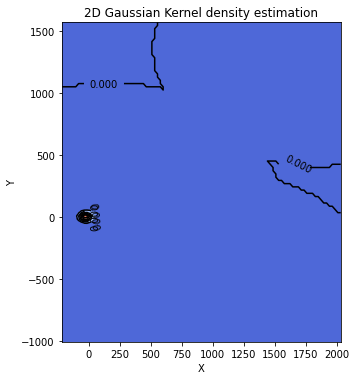

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

# Extract x and y
x = np.array(X_2d)[:,0]
y = np.array(X_2d)[:,1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(5,20))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')


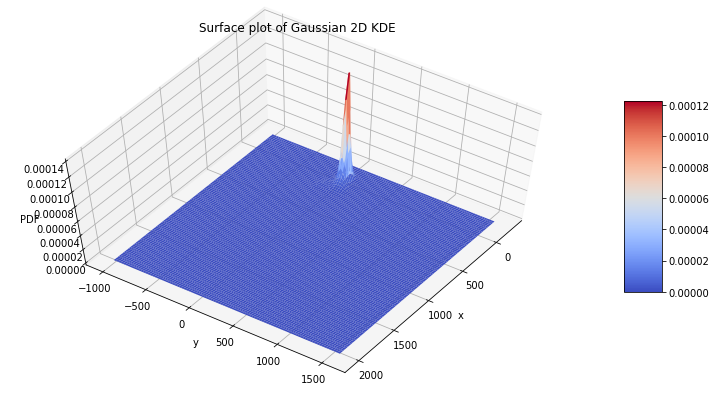

In [75]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)


In [1]:
print("")